<a href="https://colab.research.google.com/github/rivaldi165/Walmart-Sales-Analysis/blob/main/Walmart_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries and Data

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Walmart.csv")

#Preliminary and data cleansing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.duplicated().sum()

0

In the data there is no duplicated data or missing data



#EDA

##Stastitical Summary

In [5]:
numericals = ['Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']
df[numericals].describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


From the table above, the minimum and maximum values make sense for each column. The Mean ~ 50% (Median) indicating somewhat a symmetrical distribution for *Weekly_Sales*, *Fuel_Price* and *Unemployment* and indicating negatively skewed distribution for *Temperature* and *CPI*

Next I will use scatterplot to see the correlation of the data with* Weekly_Sales.*



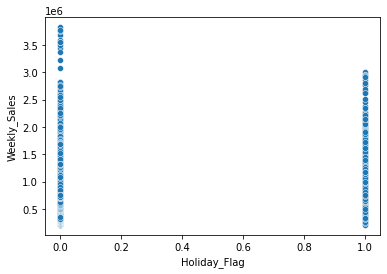

In [6]:
sns.scatterplot(x=df['Holiday_Flag'],
                y=df['Weekly_Sales'])

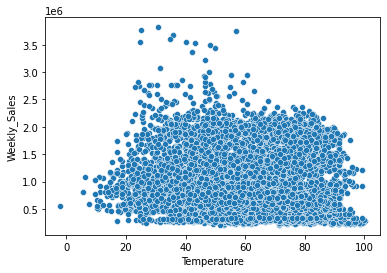

In [7]:
sns.scatterplot(x=df['Temperature'],
                y=df['Weekly_Sales'])

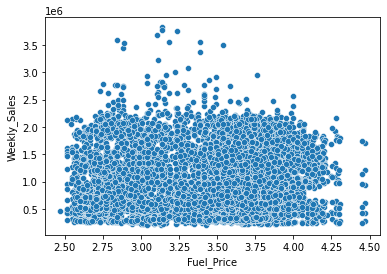

In [8]:
sns.scatterplot(x=df['Fuel_Price'],
                y=df['Weekly_Sales'])

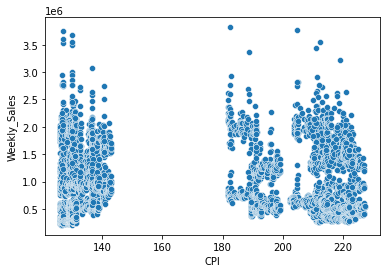

In [9]:
sns.scatterplot(x=df['CPI'],
                y=df['Weekly_Sales'])

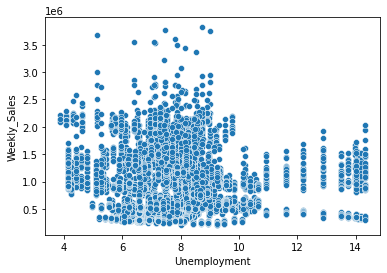

In [10]:
sns.scatterplot(x=df['Unemployment'],
                y=df['Weekly_Sales'])

From the graph above only Holiday that shown colleration with Weekly_Sales. I will focusing to analysis to more detail about the holiday effect to the sales



##Holiday Effect

Using t-test I can make sure that in holiday week the sales is improving.



In [11]:
df.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

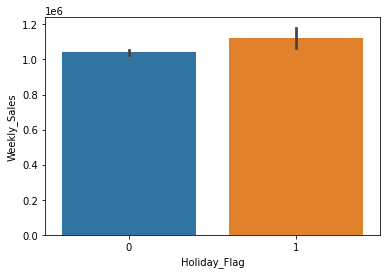

In [12]:
sns.barplot(x='Holiday_Flag', y='Weekly_Sales', data=df)

In [13]:
import scipy.stats as st
df_Holiday_1	=df[df['Holiday_Flag'] == 1]
df_Holiday_0	=df[df['Holiday_Flag'] == 0]
ttest = st.ttest_ind(a = df_Holiday_1['Weekly_Sales'], 
                      b = df_Holiday_0['Weekly_Sales'],
                      )
ttest.pvalue

0.003078699263818616

Based on t-test because the p value less than alpha value that is 0.05, I can conclude that the *Weekly_Sales* in the holiday week will increase.

Next step is to do an analysis to check which holiday week that effect weekly sales the most. By checking the date in the holiday week and make a new column with description of event the holiday week.

In [14]:
df_Holiday_1['Date'].unique() 

array(['12-02-2010', '10-09-2010', '26-11-2010', '31-12-2010',
       '11-02-2011', '09-09-2011', '25-11-2011', '30-12-2011',
       '10-02-2012', '07-09-2012'], dtype=object)

In that date there the event is :


* Super Bowl at the date of 12-Feb-10, 11-Feb-11, and 10-Feb-12
* Labor Day pada at the date of 10-Sep-10, 9-Sep-11, and 7-Sep-12
* Thanksgiving at the date of 26-Nov-10 and 25-Nov-11
* Christmas at the date of 31-Dec-10 and 30-Dec-11

In [15]:
#Mapping holiday description
Holiday_Clarity={
    '12-02-2010':'Super Bowl',
    '11-02-2011':'Super Bowl',
    '10-02-2012':'Super Bowl',
    '10-09-2010':'Labor Day',
    '09-09-2011':'Labor Day',
    '07-09-2012':'Labor Day',
    '26-11-2010':'Thanksgiving',
    '25-11-2011':'Thanksgiving',
    '31-12-2010':'Christmas',
    '30-12-2011':'Christmas',
}
df['Holiday_Event']=df['Date'].map(Holiday_Clarity,na_action='ignore') 
df.fillna('No Holiday', inplace=True)
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Event
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,No Holiday
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,Super Bowl
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,No Holiday
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,No Holiday
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,No Holiday


In [16]:
df.groupby('Holiday_Event')['Weekly_Sales'].mean()

Holiday_Event
Christmas       9.608331e+05
Labor Day       1.042427e+06
No Holiday      1.041256e+06
Super Bowl      1.079128e+06
Thanksgiving    1.471273e+06
Name: Weekly_Sales, dtype: float64

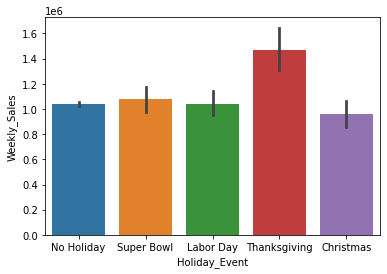

In [17]:
sns.barplot(x='Holiday_Event', y='Weekly_Sales', data=df)

From the graph can be seen that in the event of Christmas and labor day, the weekly sales not shown improvement. But in the thanksgiving and super bowl there is improvement. Where in thanksgiving the sale shown the highest value. This improvement is because of the black Friday sales that happens in the same week. For the Christmas most family already buy the family need two weeks before. This can be seen in the monthly sales that shown at the end of the year the Walmart sales is at the highest point. It also means that the sales at the start of the year at the lowest point.

In [18]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month 
df['year'] =df['Date'].dt.year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


([<matplotlib.axis.XTick at 0x7fefc234ca50>,
 <a list of 12 Text major ticklabel objects>)

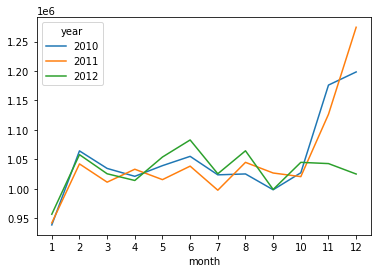

In [19]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()
x = np.arange(1, 13, 1)
plt.xticks(x)

#Modeling weekly sales

##Data manipulation

For forecasting I will need to manipulate the data to improve the result of the model. It is done be removing *Date*,* Holiday_Flag*, *Holiday_Event*, and *month* because this column can be represent by *week* column.

In [20]:
df_copy=df.copy() #copy original data
df_copy.drop(['Date', 'Holiday_Flag', 'Holiday_Event','month'], axis = 'columns', inplace = True)
df_copy.head()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,week,year
0,1,1643690.90,42.31,2.572,211.096358,8.106,17,2010
1,1,1641957.44,38.51,2.548,211.242170,8.106,48,2010
2,1,1611968.17,39.93,2.514,211.289143,8.106,7,2010
3,1,1409727.59,46.63,2.561,211.319643,8.106,8,2010
4,1,1554806.68,46.50,2.625,211.350143,8.106,18,2010


##Split Data

Next check the multicollinearity by using VIF score.

In [21]:
from sklearn.model_selection import train_test_split

feature = df_copy.drop(columns='Weekly_Sales')
target = df_copy[['Weekly_Sales']]

feature_df_train, feature_df_test, target_df_train, target_df_test = train_test_split(feature, target, 
                                                                                      test_size=0.20, 
                                                                                      random_state=42)

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_df_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,Store,1.077833
2,Temperature,1.130737
3,Fuel_Price,3.118963
4,CPI,1.336835
5,Unemployment,1.267266
6,week,1.037679
7,year,3.151026


The VIF score is below 4 so there is no multicollinearity in the data.

##Ridge regression

For the first model will be using ridge regression

In [22]:
# split train test
from sklearn.model_selection import train_test_split

feature = df_copy.drop(columns='Weekly_Sales')
target = df_copy[['Weekly_Sales']]

# First splitting: pretrain and test
feature_df_pretrain, feature_df_test, target_df_pretrain, target_df_test = train_test_split(feature, target, 
                                                                                            test_size=0.20, random_state=42)

# Second splitting: train and validation
feature_df_train, feature_df_validation, target_df_train, target_df_validation = train_test_split(feature_df_pretrain, target_df_pretrain, test_size=0.20, random_state=42)




In [23]:
from sklearn.linear_model import Ridge

# train the model
X_df_train = feature_df_train.to_numpy()
y_df_train = target_df_train.to_numpy()
y_df_train = y_df_train.reshape(len(y_df_train,))

# define the model
# 4 models with 4 different alphas (lambda)
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_df_train, y_df_train)
ridge_reg_pointone.fit(X_df_train, y_df_train)
ridge_reg_one.fit(X_df_train, y_df_train)
ridge_reg_ten.fit(X_df_train, y_df_train)

Ridge(alpha=10, random_state=42)

Choosing the best RMSE

In [24]:
from sklearn.metrics import mean_squared_error

X_df_validation = feature_df_validation.to_numpy()
y_df_validation = target_df_validation.to_numpy()
y_df_validation = y_df_validation.reshape(len(y_df_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_df_validation)
    rmse = np.sqrt(mean_squared_error(y_df_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 513266.7445270945
RMSE of Ridge regression model with alpha = 0.1 is 513266.71079090465
RMSE of Ridge regression model with alpha = 1.0 is 513266.37830340076
RMSE of Ridge regression model with alpha = 10 is 513263.5061990573


The best RMSE is with alpha value of 10.

In [25]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})


###Evaluate

Training Error

In [26]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

In [27]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_df_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_df_train)

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_df_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_df_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_df_train)))


RMSE for training data is 523309.5703337431
MAE for training data is 431365.66516299866
MAPE for training data is 0.4148334023271212


Testing Error

In [28]:
# prepare prediction result on test data
X_df_test = feature_df_test.to_numpy()
y_predict_test = ridge_best.predict(X_df_test)

# ground truth target
y_df_test = target_df_test.to_numpy()
y_df_test = y_df_test.reshape(len(y_df_test),)

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_df_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_df_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_df_test, y_predict_test)))

RMSE for testing data is 522179.0373052897
MAE for testing data is 431907.8576278337
MAPE for testing data is 0.6200665416804746


The model result shown MAPE of 62% so the model is to underfitting. Will need more complex model that is Random Forest Regressor

## RandomForestRegressor

In [30]:
# Use numpy to convert to arrays
import numpy as np
# Labels are the values we want to predict
predict = np.array(df_copy['Weekly_Sales'])
# Remove the labels from the features
# axis 1 refers to the columns
df_copy= df_copy.drop('Weekly_Sales', axis = 1)
# Saving feature names for later use
df_copy_list = list(df_copy.columns)
# Convert to numpy array
df_copy = np.array(df_copy)

In [31]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_predict, test_predict = train_test_split(df_copy, predict, 
                                                                              test_size = 0.25, 
                                                                              random_state = 42)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42, n_jobs=-1)
# Train the model on training data
rf.fit(train_features, train_predict);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
errors = abs(predictions - test_predict)

### Evaluate the Random Forest Regressor

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

mape = 100 * (errors / test_predict)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy for test data is', round(accuracy, 2), '%.')
print('RMSE for test data is {}'.format(np.sqrt(mean_squared_error(test_predict, predictions))))
print('MAE for test data is {}'.format(mean_absolute_error(test_predict, predictions)))
print('MAPE for test data is {}'.format(mean_absolute_percentage_error(test_predict, predictions)))
print('R2 Score for test data is {}'.format(r2_score(test_predict, predictions)))

Accuracy for test data is 93.31 %.
RMSE for test data is 133312.4909916998
MAE for test data is 73665.10862249836
MAPE for test data is 0.06687832964611742
R2 Score for test data is 0.9446293058278471


This model shown better MAPE with the value of 6.69%, that mean there is deviation of 6.69% to the true value of *weekly_sales*. With the accuracy of 93.31% and have 94.46% of variability of *weekly_sales* is successfully explained using all the features in the model

### Visualization of the model

In [33]:
weeks = test_features[:, df_copy_list.index('week')]

In [34]:
weeks = test_features[:, df_copy_list.index('week')]
predictions_data = pd.DataFrame(data = {'week': weeks, 'prediction_sales': predictions})
actual_data = pd.DataFrame(data = {'week': weeks, 'actual_sales': test_predict})

In [35]:
weeks = test_features[:, df_copy_list.index('week')]
predictions_data = pd.DataFrame(data = {'week': weeks, 'prediction_sales': predictions})
actual_data = pd.DataFrame(data = {'week': weeks, 'actual_sales': test_predict})
Actual_mean = (actual_data
            .groupby('week')
            .agg(Actual_Sales=('actual_sales','mean'))
            .reset_index()
            .sort_values('week',ascending=True)
            )
Prediction_mean = (predictions_data
            .groupby('week')
            .agg(Prediction_Sales=('prediction_sales','mean'))
            .reset_index()
            .sort_values('week',ascending=True)
            )

([<matplotlib.axis.XTick at 0x7fefbe4bcb10>,
 <a list of 52 Text major ticklabel objects>)

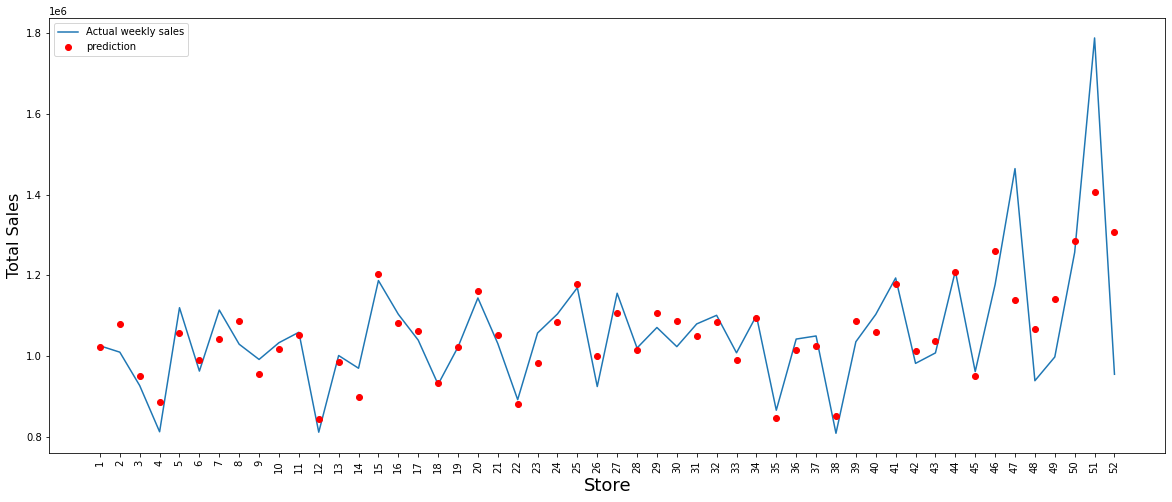

In [36]:
plt.figure(figsize=(20,8))
Actual_mean['week'] = Actual_mean['week'].astype(int)
Prediction_mean['week'] = Prediction_mean['week'].astype(int)
plt.plot(Actual_mean['week'] , Actual_mean['Actual_Sales'], label = 'Actual weekly sales')
plt.plot(Prediction_mean['week'] , Prediction_mean['Prediction_Sales'], 'ro', label = 'prediction')
plt.legend(loc='upper left');
plt.xticks(rotation=90)
plt.xlabel('Store', fontsize=18)
plt.ylabel('Total Sales', fontsize=16)
x = np.arange(1, 53, 1)
plt.xticks(x)

#Conclusion

1. *CPI, temperature, unemployment,* dan *fuel price* now shown any pattern with *weekly_sales*
3. With Holiday event will improve the weekly sales. With thanksgiving shown the highest improvement because of the black Friday sales that happens in the same week. But for the Christmas shown less weekly sales because most family already buy the family need two weeks before.
4. The highest sales will happen at the end of the year because of the Christmas and new year eve. This also effect the sales at the start of the year that will at the lowest point.
5. The modeling weekly sales using Random Forest Regressor with deviation of 6.69% to the true value of *weekly_sales*. Accuracy of 93.31% and have 94.46% of variability of *weekly_sales* is successfully explained using all the features in the model